# **Network Analysis of Particulate Matter (PM2.5) Emissions in India**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx

# **Introduction and Motivation**
Air pollution refers to the excessive release of pollutants into the atmosphere. It plays an important role in a wide range of environmental and health problems and has been one of the major problems to deal with for any nation.
Air pollution fluctuations have been found to strongly depend on the changing weather dynamics. The impact of weather on the daily fluctuations of air pollution is still not clear. Effects of changing weather cause air pollution at a particular region a few days or even a week later.
Air pollution has emerged as a major challenge in Delhi, India.
The aim of this project is to create a novel multilayer and multivariable network to detect the influence of weather dynamics on the temporal variability of surface air pollution.

[Sources Of Pollution in Delhi](https://www.investindia.gov.in/team-india-blogs/project-breathe-resolving-delhis-pollution-through-technology-and-innovation)

[Air Pollution in Delhi](https://www.youtube.com/watch?v=bVzvZxW5n2Q)





In [2]:
#Access data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#Load Air Quality Index dataset of India
df_aqiIndia = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/AQI_India.csv')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Explore Dataset

Air Quality Index India

*   so2 - Sulphor Dioxide
*   no2 - Nitrogen Dioxide
*   rspm - Respirable Suspended Particulate Matter
*   spm - Suspended Particulate Matter
*   pm2_5 - Particulate Matter






In [4]:
df_aqiIndia.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,02-01-1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,02-01-1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,02-01-1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,03-01-1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,03-01-1990


In [5]:
df_aqiIndia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [6]:
df_aqiIndia.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [9]:
df_aqiIndia.describe(include='all')

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
count,291665.0,435739,435742,435739,286261,430349,401096.000000,419509.000000,395520.000000,198355.000000,408251,9314.000000,435735
unique,803.0,5071,37,304,64,10,NaN,NaN,NaN,NaN,991,NaN,5067
top,193.0,19-03-2015,Maharashtra,Guwahati,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",NaN,NaN,NaN,NaN,Regional Office,NaN,3/19/2015
freq,1428.0,253,60384,9984,27857,179014,NaN,NaN,NaN,NaN,6261,NaN,253
mean,NaN,NaN,NaN,NaN,NaN,NaN,10.829414,25.809623,108.832784,220.783480,NaN,40.791467,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,11.177187,18.503086,74.872430,151.395457,NaN,30.832525,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,14.000000,56.000000,111.000000,NaN,24.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,22.000000,90.000000,187.000000,NaN,32.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,13.700000,32.200000,142.000000,296.000000,NaN,46.000000,NaN


In [10]:
df_aqiIndia.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/2015
435738,SAMP,29-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/2015
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing Values

In [11]:
df_aqiIndia.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [13]:
(df_aqiIndia.isnull().sum() / len(df_aqiIndia)) * 100

stn_code                       33.064749
sampling_date                   0.000688
state                           0.000000
location                        0.000688
agency                         34.304933
type                            1.237659
so2                             7.951035
no2                             3.725370
rspm                            9.230692
spm                            54.478797
location_monitoring_station     6.309009
pm2_5                          97.862497
date                            0.001606
dtype: float64

Data Analysis

In [14]:
df_aqiIndia['agency'].value_counts()
df_aqiIndia['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [15]:
# Delete all values which have null in type attribute
df_aqiIndia = df_aqiIndia.dropna(axis = 0, subset = ['type'])
# Delete all values which are null in location attribute
df_aqiIndia = df_aqiIndia.dropna(axis = 0, subset = ['location'])
# Delete all null values in so2 attribute
df_aqiIndia = df_aqiIndia.dropna(axis = 0, subset = ['so2'])

df_aqiIndia.isnull().sum()

stn_code                       119813
sampling_date                       0
state                               0
location                            0
agency                         125169
type                                0
so2                                 0
no2                              1981
rspm                            29643
spm                            228178
location_monitoring_station     20567
pm2_5                          386966
date                                4
dtype: int64

In [16]:
# Delete columns not of interest to us
del df_aqiIndia['stn_code']
del df_aqiIndia['sampling_date']
del df_aqiIndia['agency']
del df_aqiIndia['location_monitoring_station']

df_aqiIndia.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,02-01-1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,02-01-1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,02-01-1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,03-01-1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,03-01-1990


In [40]:
states = df_aqiIndia['state'].unique()
states

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal'], dtype=object)

In [18]:
df_aqiIndia['state'].nunique()
# 34 States

34

In [41]:
districts = df_aqiIndia['location'].unique()
districts

array(['Hyderabad', 'Visakhapatnam', 'Tirupati', 'Vijayawada',
       'Patancheru', 'Ramagundam', 'Kurnool', 'Guntur', 'Nalgonda',
       'Nellore', 'Warangal', 'Chittoor', 'Khammam', 'Ananthapur',
       'Eluru', 'Kadapa', 'Kakinada', 'Karimnagar', 'Nizamabad', 'Ongole',
       'Rajahmundry', 'Sangareddy', 'Srikakulam', 'Vizianagaram',
       'Itanagar', 'Naharlagun', 'Guwahati', 'Bongaigaon', 'Dibrugarh',
       'Golaghat', 'Hailakandi', 'Sibsagar', 'Tezpur', 'Silchar',
       'Daranga', 'Lakhimpur', 'Nagaon', 'Nalbari', 'Sivasagar',
       'Silcher', 'Tinsukia', 'Margherita', 'Sindri', 'Jharia', 'Dhanbad',
       'Jamshedpur', 'Patna', 'Chandigarh', 'Korba', 'Bhilai Nagar',
       'Raipur', 'Bhilai', 'Bilaspur', 'Silvassa', 'Khadoli',
       'Daman Diu & Nagar', 'Daman', 'Delhi', 'Vasco', 'Panaji',
       'Mormugao', 'Amona', 'Assanora', 'Bicholim', 'Codli', 'Curchorem',
       'Honda', 'Usgao', 'Kundaim', 'Mapusa', 'Margao', 'Ponda',
       'Sanguem', 'Tilamol', 'Cuncolim', 'Baroda

In [19]:
df_aqiIndia['location'].nunique()
# 296 locations

296

Various sources pollution

In [20]:
#changing type to only 3 categories
a = list(df_aqiIndia['type'])
for i in range(0, len(df_aqiIndia)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df_aqiIndia['type'] = a
df_aqiIndia['type'].value_counts()


Residential    244017
Industrial     137420
Other           14724
Name: type, dtype: int64

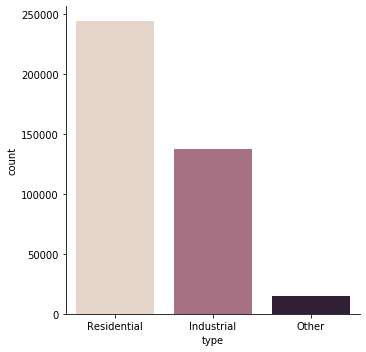

In [21]:
sns.catplot(x = "type", kind = "count", palette = "ch: 0.15", data = df_aqiIndia)

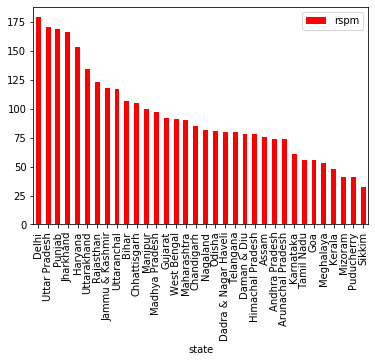

In [22]:
# Consentration of rspm in different states
df_aqiIndia[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'r')

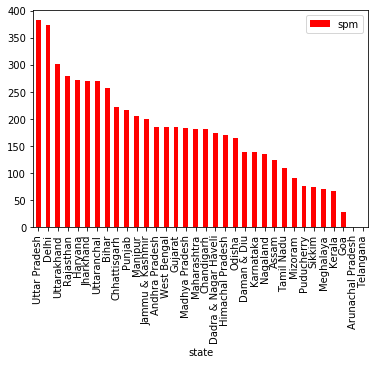

In [23]:
# Consentration of spm in different states
df_aqiIndia[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'r')

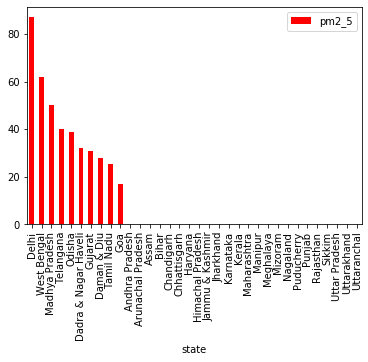

In [24]:
# Consentration of pm2_5 in different states
df_aqiIndia[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).plot.bar(color = 'r')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


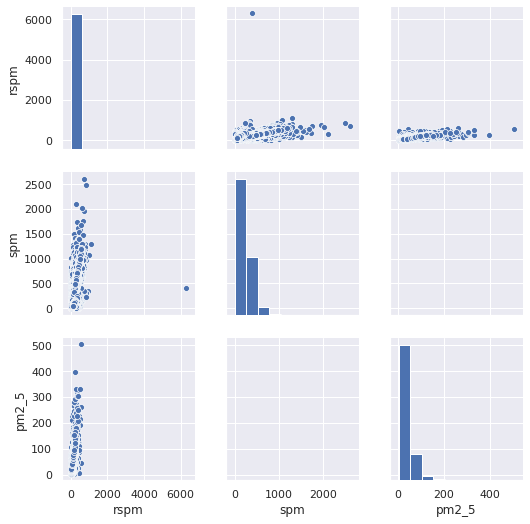

In [25]:
# Scatter plots of all columns
sns.set()
cols = ['rspm', 'spm', 'pm2_5']
sns.pairplot(df_aqiIndia[cols], size = 2.5)
plt.show()

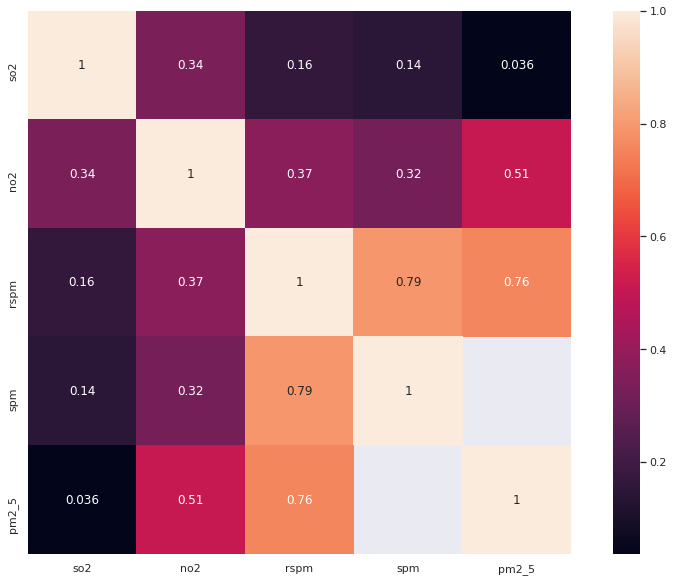

In [26]:
# Correlation matrix
corrmat = df_aqiIndia.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)

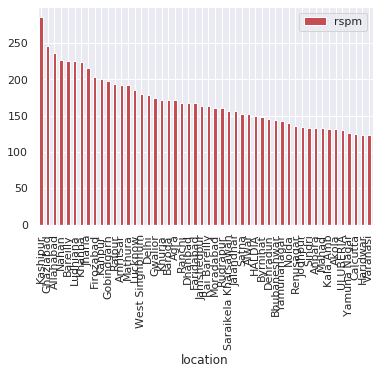

In [27]:
# rspm - location wise - first 50
df_aqiIndia[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).head(50).plot.bar(color = 'r')

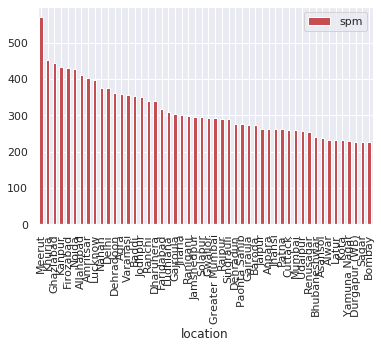

In [28]:
# spm - location wise - first 50
df_aqiIndia[['spm', 'location']].groupby(['location']).median().sort_values("spm", ascending = False).head(50).plot.bar(color = 'r')

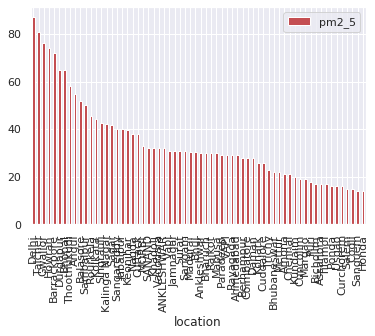

In [29]:
# pm2_5 vs location - all non null values
df_aqiIndia[['pm2_5', 'location']].groupby(['location']).median().sort_values("pm2_5", ascending = False).head(64).plot.bar(color = 'r')

# Create Graph

In [38]:
df_states = df_aqiIndia.groupby('state')
# df_states

df_stateNodes = df_states.apply(lambda x: x['location'].unique())
df_stateNodes

state
Andhra Pradesh          [Hyderabad, Visakhapatnam, Tirupati, Vijayawad...
Arunachal Pradesh                                  [Itanagar, Naharlagun]
Assam                   [Guwahati, Bongaigaon, Dibrugarh, Golaghat, Ha...
Bihar                        [Sindri, Jharia, Dhanbad, Jamshedpur, Patna]
Chandigarh                                                   [Chandigarh]
Chhattisgarh              [Korba, Bhilai Nagar, Raipur, Bhilai, Bilaspur]
Dadra & Nagar Haveli                                  [Silvassa, Khadoli]
Daman & Diu                                    [Daman Diu & Nagar, Daman]
Delhi                                                             [Delhi]
Goa                     [Vasco, Panaji, Mormugao, Amona, Assanora, Bic...
Gujarat                 [Baroda, Surat, Ahmedabad, Ankleshwar, Rajkot,...
Haryana                 [Faridabad, Yamuna Nagar, Dharuhera, Hisar, Ya...
Himachal Pradesh        [Shimla, Paonta Sahib, Parwanoo, Damtal, Baddi...
Jammu & Kashmir                 

In [32]:
df_stateNodes = df_stateNodes.apply(pd.Series)
df_stateNodes

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
state,,,,,,,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,Hyderabad,Visakhapatnam,Tirupati,Vijayawada,Patancheru,Ramagundam,Kurnool,Guntur,Nalgonda,Nellore,Warangal,Chittoor,Khammam,Ananthapur,Eluru,Kadapa,Kakinada,Karimnagar,Nizamabad,Ongole,Rajahmundry,Sangareddy,Srikakulam,Vizianagaram,NaN,NaN,NaN
Arunachal Pradesh,Itanagar,Naharlagun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assam,Guwahati,Bongaigaon,Dibrugarh,Golaghat,Hailakandi,Sibsagar,Tezpur,Silchar,Daranga,Lakhimpur,Nagaon,Nalbari,Sivasagar,Silcher,Tinsukia,Margherita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bihar,Sindri,Jharia,Dhanbad,Jamshedpur,Patna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chandigarh,Chandigarh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chhattisgarh,Korba,Bhilai Nagar,Raipur,Bhilai,Bilaspur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dadra & Nagar Haveli,Silvassa,Khadoli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daman & Diu,Daman Diu & Nagar,Daman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delhi,Delhi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Create new Graph object
G = nx.Graph()

In [0]:
# nodeNames = [n[0] for n in df_stateNodes]

# Add your lists of nodes and edges
# column_edge = 'Andhra Pradesh'
# column_ID = 0

# data_to_merge = df_stateNodes[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates() # select columns, remove NaN

# To create connections between districts and states
# join data with itself on the 'ID' column.
# data_to_merge = data_to_merge.merge(
#     data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
#     on=column_edge
# )

nodeNames = districts
# edges = states

G.add_nodes_from(nodeNames)
# G.add_edges_from(edges)

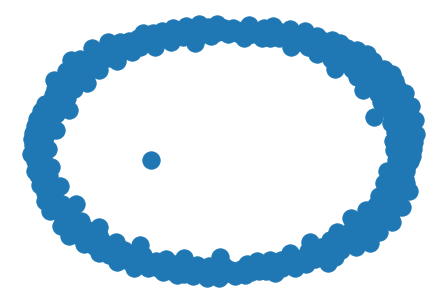

In [45]:
# Draw graph
nx.draw(G)